# Проект по принятию решение в бизнесе с помощью гипотез а А\В тестов.

# Описание проекта

Я как аналитик нашего крупного интернет-магазина вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.
Теперь нам нужно приоритизировать гипотезы, запустить A/B-тест и проанализируйте результаты. 

Итак, что мы имеем.

У нас есть 3 датафрейма.

Первый это файл с набором данных по 9 гипотезам по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Второй и третий - результат проведенного A/B-теста , которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Работу проведем в 3 этапа.

1. Посмотрим файлы и сделаем предоработку.
2. Проведем приоритизацию гипотез.
3. Сделаем анализ а-в тестов.

### Предоработка данных

Для начала загрузим все нужные библиотеки ( вначале я могу все и не включить, но по мере выполнения проекта при необходимости я буду возвращаться  к этому шагу, чтобы дополнить их и в итоге все загруженные библиотеки будут в 1 месте).

In [2]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

Теперь загрузим датасеты

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors  = pd.read_csv('/datasets/visitors.csv')

In [3]:
pd.set_option('display.max_columns', None)

Рассмотрим каждый датафрейм

hypothesis

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
pd.options.display.max_colwidth = 130

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Тут все понятно, есть список гипотез и расставлены оценки значимости по 10 бальной шкале.

orders

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

In [14]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [15]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [16]:
orders.duplicated().sum()

0

Проверяем на пропуски и дубликаты для чистоты эксперимента. Все в порядке.

visitors

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [20]:
visitors.duplicated().sum()

0

In [21]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


На первом этапе мы загрузили библиотеки, загрузили сами файлы, изучили их. Убедились , что пропусков и дубликатов нет. Названия колонок привели к единому стилю. Тип данных для столбца даты перевели в нужный.

### Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.

In [23]:
hypothesis['ICE'] = (hypothesis['impact'] *hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2).head()

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00


Первые топ-5 гипотез мы определили. Теперь применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [24]:
hypothesis['RICE'] = (hypothesis['reach'] *hypothesis['impact'] *hypothesis['confidence'])/hypothesis['efforts']

print(hypothesis[['hypothesis' , 'RICE']].sort_values(by='RICE', ascending=False))


                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Имеется разница между приоритизацией  разными методами. Видимо потому что одна учитывает пользователей, которых затронут изменения, а другая только приоритет.

По части приоритизации гипотез следует выбрать следующие:
    
    - Запустить акцию, дающую скидку на товар в день рождения
    - Добавить два новых канала привлечения трафика
    - Добавить форму подписки на все основные страницы
    - Добавить блоки рекомендаций товаров на сайт интернет магазина

### Анализ A/B-теста.

Для анализа А/В теста нам нужно построить графики по кумулятивным группам. Для построения графиков нужно собрать кумулятивные данные и объявить датафреймы.

In [25]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [26]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [27]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [28]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [29]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [30]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [31]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [32]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [33]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

In [34]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Агрегируем кумулятивные  значения мы все получили, теперь приступаем к построению графиков.

Построим график кумулятивной выручки по группам.

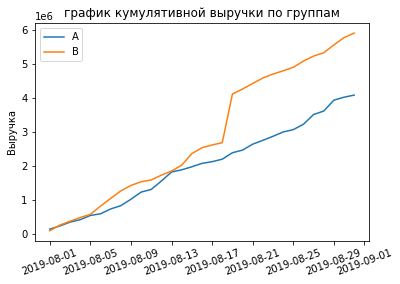

In [35]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('график кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=20)
plt.legend()
plt.show()


Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки  группы В в точке 19 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Теперь построим график кумулятивного среднего чека по группам. 

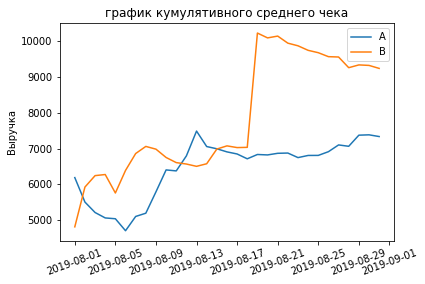

In [36]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график кумулятивного среднего чека')
plt.ylabel("Выручка")
plt.xticks(rotation=20)
plt.legend()
plt.show()

Средний чек группы А рос более равномерно и потом держался на уровне 7000, а вот группа В резко выросла и теория о дорогой покупке стала ближе к истине.

Теперь построим график относительного изменения кумулятивного среднего чека группы B к группе A.

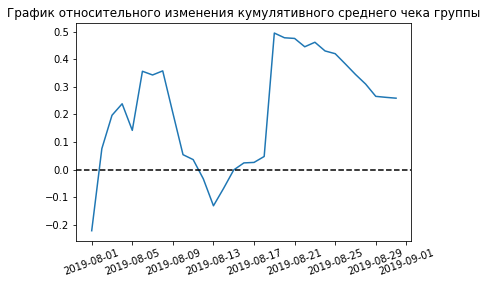

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы')
plt.xticks(rotation=20)
plt.show()

Идет то резкий рост, то убыль, потом опять рост. Либо в данных ошибка, либо крупные покупки так могут влиять.

Построим график кумулятивного среднего количества заказов на посетителя по группам.

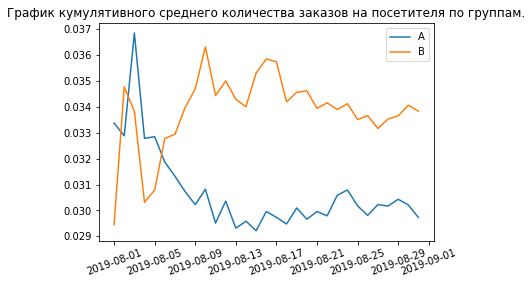

In [38]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивного среднего количества заказов на посетителя по группам.')
plt.xticks(rotation=20)
plt.show()

Симметричный график получился! Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

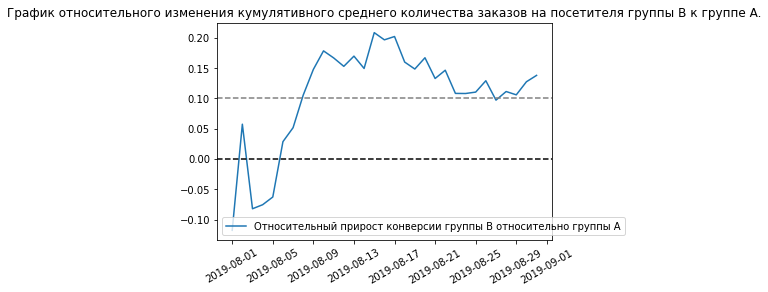

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.xticks(rotation=30)
plt.show()


В начале не понятно за кем будет итог, но спустя пару дней В стремительно набрала оборот и на пике удерживала превосходство, потом немного просели значения, но в конце опять тенденция к росту. Но не дают покоя предыдущие графики, где явный намек на выборсы. Сперва стоит проанализировать аномалии, возможно, они изменят картину. А потом уже будем делать окончательные выводы.

Построим точечный график количества заказов по пользователям.

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


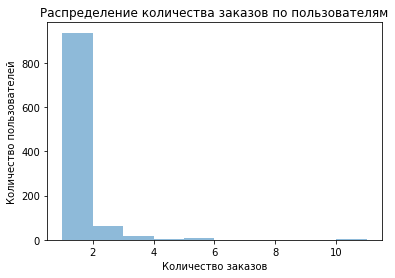

In [40]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

plt.hist(ordersByUsers['orders'], alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()


Обычно заказ оформляют 1 раз , очень мало 2, но есть и те, кто 11????

Оценим стоимость заказов ещё одним способом.

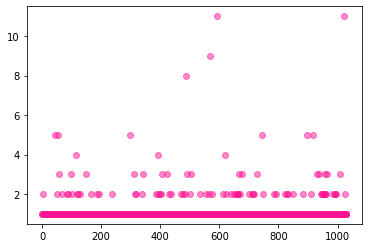

In [41]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'],color='deeppink', alpha=0.5) 
plt.show()

2-3 заказа тоже часто встречается, от 6 и выше уже исключение.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [42]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Только 5% совершали больше 2-х покупок, еще 1% купили 4 раза. 4 заказа, это потолок, его возьмем за отсечку.

Построим точечный график стоимостей заказов.

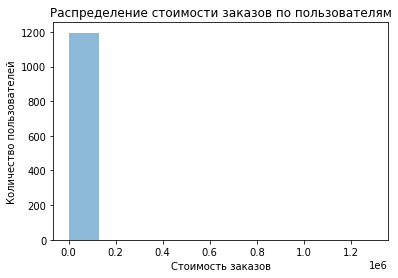

In [43]:
plt.hist(orders['revenue'], alpha=0.5)  
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

Ого какой дорогой заказ получился, больше 1 млн. Но кроме этого ничего не понятно. Сейчас построим другой график.

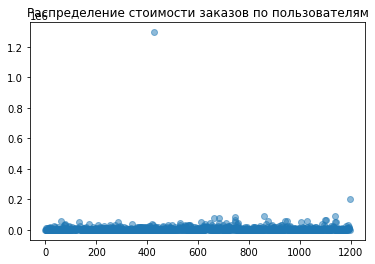

In [44]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Видно, что этот заказ 1 такой, нужно его отрезать, чтобы картина стала более ясной.

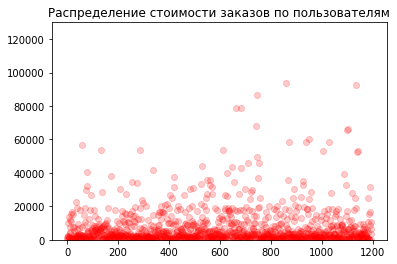

In [45]:
plt.ylim(0, 130000)
plt.scatter(x_values, orders['revenue'], color='red', alpha=0.2)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

20 тыс, это основная масса. Теперь посмотрим по процентилям 95 и 99.

In [46]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Как и видно было по графику, только 5% превышают заказ 28к и 1% - 58к. Дальше уже аномалии.

Теперь перейдем к анализу статистической значимости

Итак,  мы  оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
Увидели выбросы и нашли границу для их определения.
Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Уровень значимости определим - 0.05

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [47]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

P-value меньше 0.05 , поэтому нулевую гипотезу отвергаем. Относительный прирост среднего группы В к конверсии группы А всего 13,8%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы А значительно ниже среднего чека группы В.

In [49]:
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

stat_significance(sampleA, sampleB)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


Теперь возьмемся за очищенные данные. Для начала посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [50]:
many_orders = np.percentile(ordersByUsers['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]


1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Всего 15 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [52]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.014
0.153


Нулевую гипотезу отвергаем, значение ниже 0.05, значит между группами есть разница. А она достигает 15% группы относительного прироста по сравнению с А группой.

In [53]:
def stat_significance(data_c, data_d):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_c, data_d)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_d.mean() / data_c.mean()-1))

stat_significance(sampleAFiltered, sampleBFiltered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


Теперь смотрим очищенные данные по среднему чеку

In [54]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


Тут нулевая гипотеза подтверждается, значит группы не могут быть разными. Разница по средним чекам минимальная.

# Выводы

Итак, аналитический  отдел нашего крупного интернет-магазина вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.

На первом этапе мы загрузили библиотеки, загрузили сами файлы, изучили их. Убедились , что пропусков и дубликатов нет. Названия колонок привели к единому стилю. Тип данных для столбца даты перевели в нужный.

Далее мы применилифреймворки ICE и RICE  для приоритизации гипотез. 
Поняли, что между двумя способами есть небольшая разница,  потому что одна учитывает пользователей, которых затронут изменения, а другая только приоритет.

По части приоритизации гипотез мы выбрали следующие:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика
- Добавить форму подписки на все основные страницы
- Добавить блоки рекомендаций товаров на сайт интернет магазина


 

После чего мы приступили к  A/B-тестам и анализу их  результатов.

Что мы поняли:

График кумулятивной выручки по группам показал , что выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы В в точке 19 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

График кумулятивного среднего чека по группам показал, что средний чек группы А рос более равномерно и потом держался на уровне 7000, а вот группа В резко выросла и теория о дорогой покупке стала ближе к истине.

График относительного изменения кумулятивного среднего чека группы выявил, что идет то резкий рост, то убыль, потом опять рост. Либо в данных была ошибка, либо крупные покупки так могут влиять.

График кумулятивного среднего количества заказов на посетителя по группам был очень симметричным. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показал что спустя пару дней В стремительно набрала оборот и на пике удерживала превосходство, потом немного просели значения, но в конце опять тенденция к росту. 

Точечные графики помогли нам показать анамалии и по процентилям мы поняли , что :
- Обычно заказ оформляют 1 раз , очень мало 2.
- 2-3 заказа тоже часто встречается, от 6 и выше уже исключение.
- Только 5% совершали больше 2-х покупок, еще 1% купили 4 раза. 
- только 5% превышают заказ 28к и 1% - 58к.

Далее мы перешли к анализу статистической значимости.

Итак, мы оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы; Увидели выбросы и нашли границу для их определения. Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.
Уровень значимости определим - 0.05

Мы отвергли 2 нулевых гипотезы, а именно:

Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%

Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%

И 1 теорию подтвердили :

Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


На основании всего вышесказанного считаем, что тест следует остановить и зафиксировать победу группы В.
